## Problem statement
*   Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question.

*   Classify whether question pairs are duplicates or not.

links : 
*   https://www.kaggle.com/c/quora-question-pairs
*   https://quoraengineering.quora.com/


## Machine Learning problem formulation
##### Data fields
*   id - the id of a training set question pair
*   qid1, qid2 - unique ids of each question (only available in train.csv)
*   question1, question2 - the full text of each question
*   is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

##### Type of ML problem : 
Binary classification problem. For a given pair of questions we need to predict if they are duplicate or not

##### Performace metric:
Since the cost of misclassification can be high, A good probability metric will be good for evaluation. In the competition
Quora has mentioned to use log-loss as metric which makes sense as it uses prob scores or we can also use binary confusion metrix
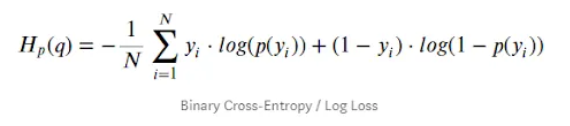

# EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# reading data

df = pd.read_csv("../data/train.csv.zip")

In [4]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


#### From the data the EDA we can do is:
*   checking of null values
*   check the distribution of data points among output classes
*   check no of duplicate pair of questions and if it exists we can remove them as it is not needed
*   check no of unique question and no of repeated questions. So it can happen that a question exists in multiple pair of qids
*   We can also plot the no of accurence of each question

In [5]:
print("No of data points: ",df.shape[0])
print("No of features: ",df.shape[1])

No of data points:  404290
No of features:  6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## Distribution of data points among output classes

In [7]:
list(df["is_duplicate"].value_counts())

[255027, 149263]

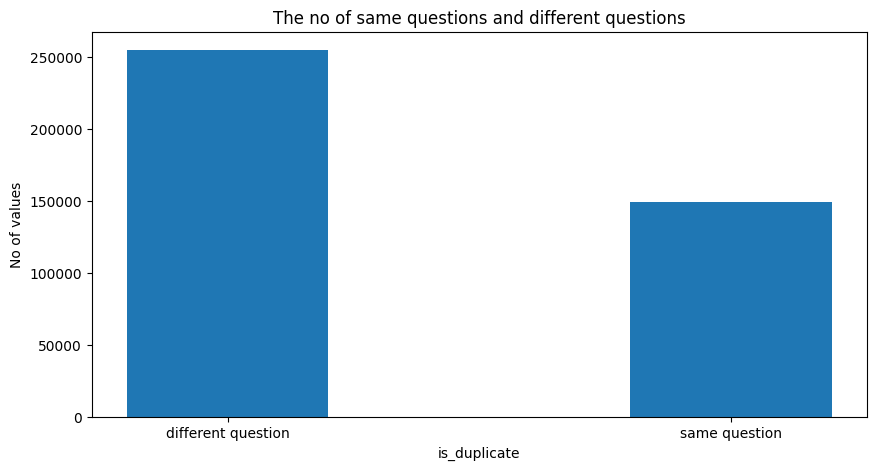

In [8]:
# no of same questions and different questions
# df.groupby("is_duplicate")["id"].count().plot.bar()
unique_label = ["different question","same question"]
countsofval = list(df["is_duplicate"].value_counts())
fig = plt.figure(figsize=(10,5))

plt.bar(unique_label, countsofval,width=0.4)

plt.xlabel("is_duplicate")
plt.ylabel("No of values")
plt.title("The no of same questions and different questions")
plt.show()



## Number of unique Questions

In [9]:
qids = pd.Series(df["qid1"].tolist()+df["qid2"].tolist())

unique_qids = len(np.unique(qids))
qids_more_than_onetime = np.sum(qids.value_counts()>1)
print("Total number of Unique Questions are: ", unique_qids)
print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qids_more_than_onetime,qids_more_than_onetime/unique_qids*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of Unique Questions are:  537933
Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



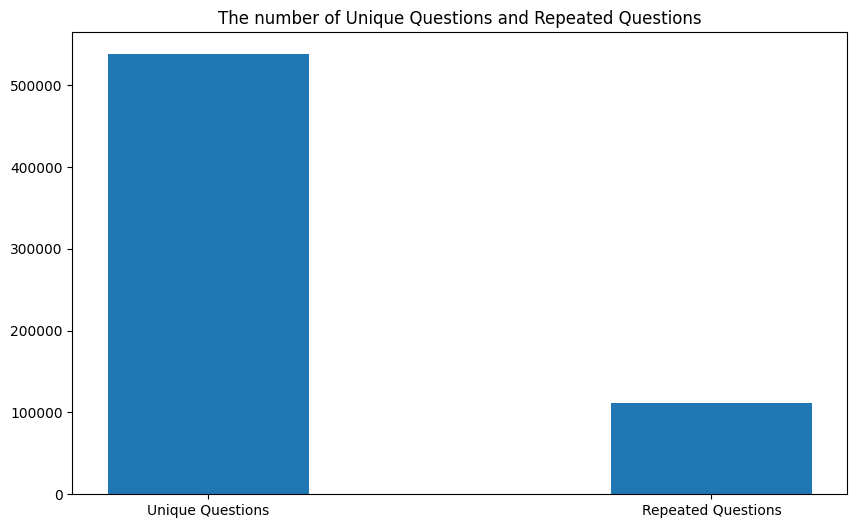

In [10]:
questions = ["Unique Questions","Repeated Questions"]
ques_val = [unique_qids,qids_more_than_onetime]
plt.figure(figsize=(10,6))
plt.bar(questions,ques_val,width=0.4)
plt.title("The number of Unique Questions and Repeated Questions")
plt.show()


## checking wheather there are any repeated pair of questions

In [11]:
pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print("Number of duplicate questions",(pair_duplicates).shape[0]-df.shape[0])

Number of duplicate questions 0


## No of occurence of each questions

Maximum number of times a single question is repeated: 157



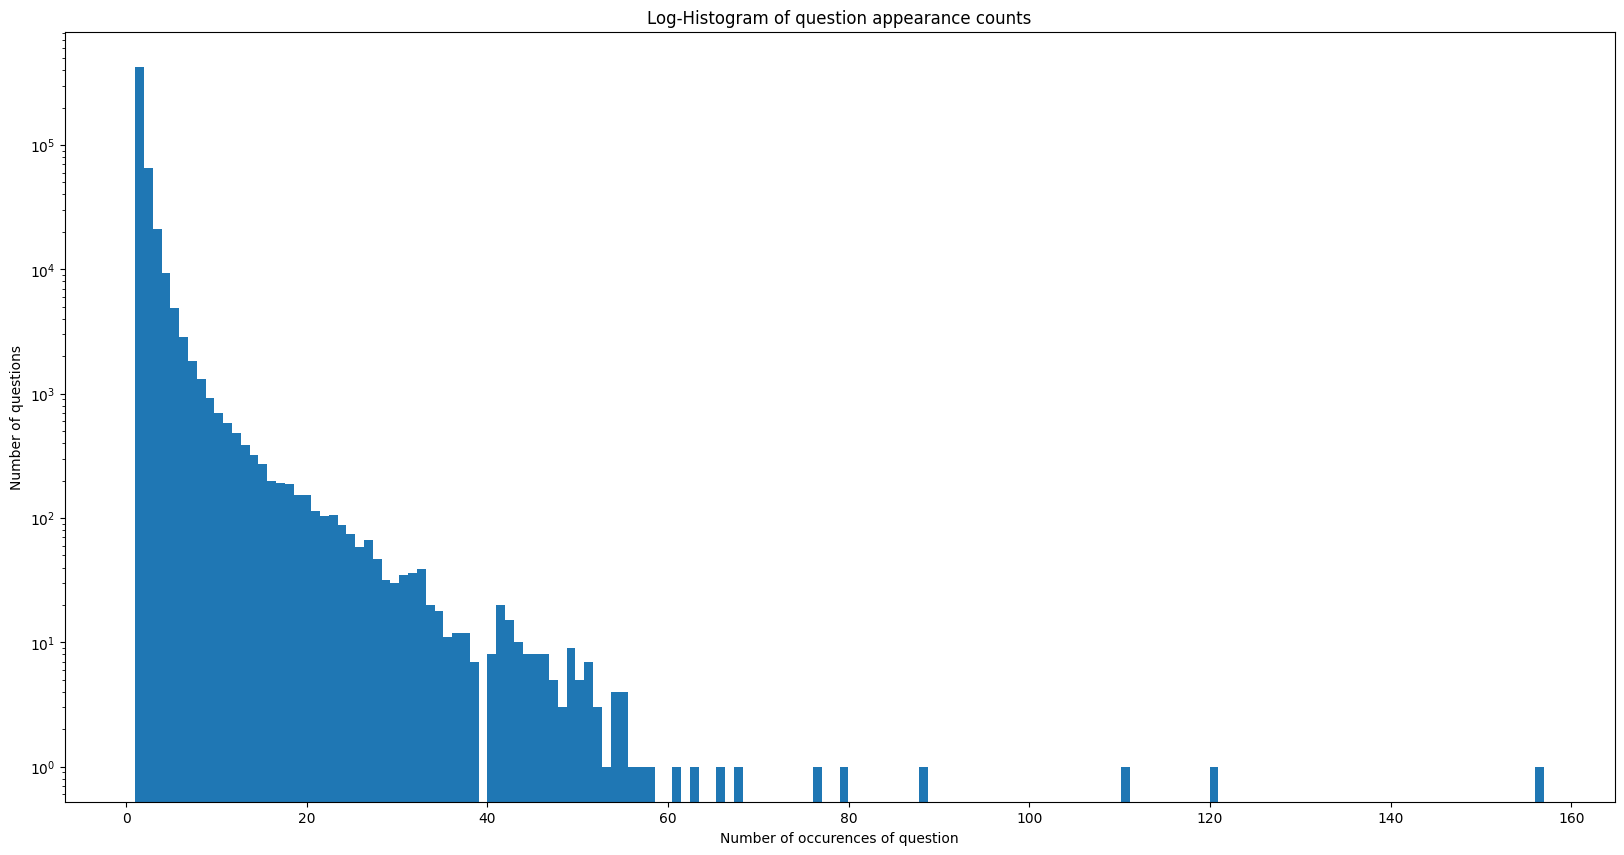

In [12]:
plt.figure(figsize=(20,10))
plt.hist(qids.value_counts(),bins=160)
plt.yscale('log')
plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

## checking for null values

In [13]:
nan_rows = df[df.isnull().any(1)]
nan_rows

C:\Users\prati\AppData\Local\Temp\ipykernel_2860\167275740.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [14]:
# if you observe qid2=174364 is common in both qid1 174363 and 303951
# we can remove the null values or impute it with emplty string as is_duplicate is false
df = df.fillna('')

# Feature Extraction ( Before preprocessing)
* Some features like frequency of qids, len of questions, words common can be created before preprocessing.
* We will check the model performance using these features before preprocessing and after preprocessing and use it accordingly while deplyong the app

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2

In [23]:
def create_basic_features(df):
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda x: len(x.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda x: len(x.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    return df

In [24]:
df_fe_without_preprocessing_train = create_basic_features(df)
df_fe_without_preprocessing_train.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
318467,318467,107685,443828,Why is China investing in Pakistan?,Why is China investing $45 billion in Pakistan...,1,2,1,35,78,6,14,5.0,18.0,0.277778,3,1
184134,184134,281400,281401,How can one start creating virtual Reality con...,What is the best way to start learning about v...,1,3,1,51,111,8,18,3.0,25.0,0.120000,4,2
376448,376448,507593,507594,My mom always overreacts about everything. Wha...,How can I forget a bad memory about my mom?,0,1,1,68,43,12,10,4.0,21.0,0.190476,2,0
31584,31584,58219,58220,How will I know if my child is taking drugs?,How do I know my daughter is not into drugs?,1,1,1,44,44,10,10,6.0,20.0,0.300000,2,0
335913,335913,451902,366976,How do I stop hating school so much?,How do I get myself to stop hating school?,1,1,2,36,42,8,9,5.0,17.0,0.294118,3,1


In [26]:
#let's save this data
df.to_csv("../data/df_fe_without_preprocessing_train.csv",index=False)

### Analysis of extracted features

In [31]:
import warnings
warnings.filterwarnings("ignore")
df= pd.read_csv("../data/df_fe_without_preprocessing_train.csv")

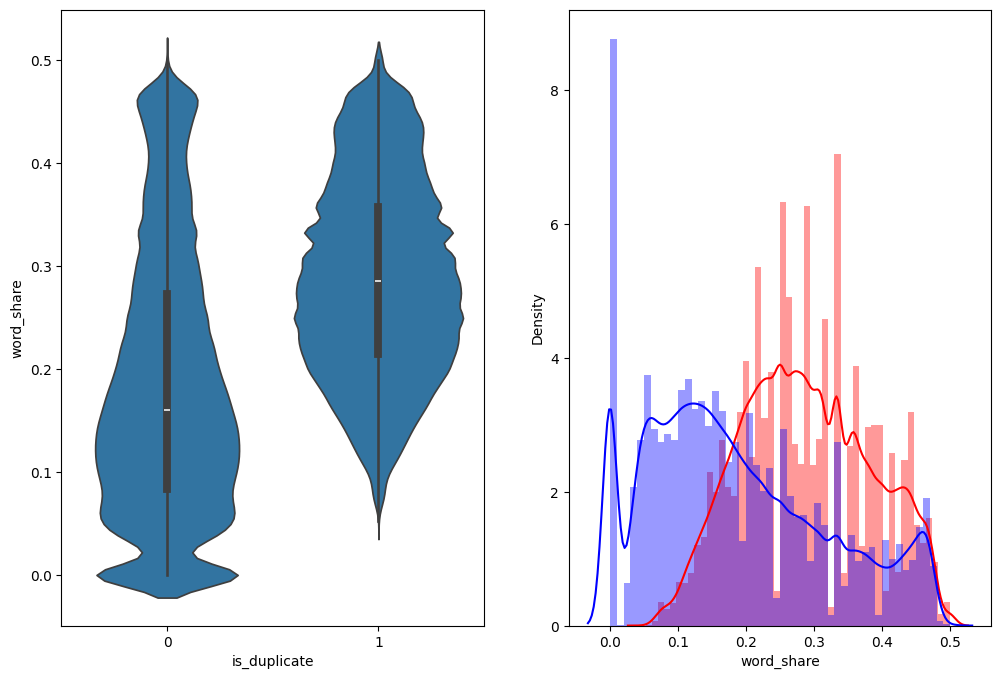

In [34]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

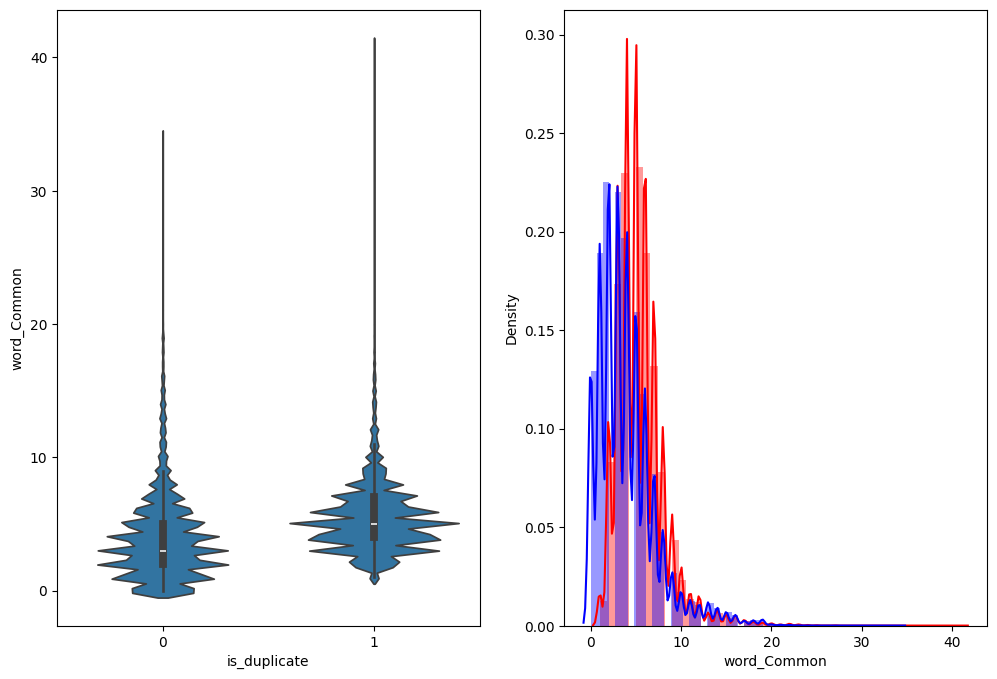

In [35]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

*   Distribution of word_common is highly ovelapping.
*   Word share feature might not be the most useful feature

# Text Preprocessing

Preprocessing:
* Removing html tags
* Removing Punctuations
* Performing stemming
* Removing Stopwords
* Expanding contractions etc.*

In [17]:
import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz

c:\Users\prati\.conda\envs\ml\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [18]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

In [19]:
df_preprocessed = df.copy()

df_preprocessed['question1'] = df_preprocessed['question1'].apply(lambda x: preprocess(x))

df_preprocessed['question2'] = df_preprocessed['question2'].apply(lambda x: preprocess(x))

In [21]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [22]:
df_preprocessed.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0


In [20]:
df_preprocessed.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
324330,324330,74837,5139,how can an introvert becomes extrovert,how do i stop being an introvert and become an...,1
118111,118111,192046,192047,can a shopkeeper accept 500 1k notes if he giv...,i am organising a house party where i can fin...,0
331861,331861,458804,458805,for free gas gas price 2 27 drive 24 miles...,did anyone had sexual affair with his friend o...,0
239818,239818,351494,351495,does amc theaters offer matinee prices,is it a good idea for amc theaters to allow pe...,0
226146,226146,334690,334691,why is the torrent download speed higher than ...,is it possible that your torrent download spee...,0
279733,279733,9016,33634,which can be the best laptop under 30k,what is the best laptop under 30k,1
331453,331453,72587,458353,how do i build an email list,why should i not build an email list,0
283057,283057,403092,403093,how do helium 3 and helium 4 differ,what is helium 3,0
374780,374780,505711,505712,what are the pros and cons of a track saw vs a...,what are the pros and cons of a track saw with...,1
152150,152150,157507,25683,which is the best laptop to buy under inr 50k,what are best laptops under 50k inr,1
